In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tiffConverter import convert_to_numpy


In [18]:
def shift_image_fft(image, shift_x, shift_y):
    """
    Shift a 2D image using a phase ramp in the Fourier domain.

    Parameters:
    image (2D numpy array): The input image to be shifted.
    shift_x (float): The shift in the x direction (horizontal shift).
    shift_y (float): The shift in the y direction (vertical shift).

    Returns:
    shifted_image (2D numpy array): The shifted image.
    """
    # Fourier transform of the image
    fft_image = np.fft.fft2(image)

    # Get the image dimensions
    rows, cols = image.shape

    # Create frequency coordinate grids
    u = np.fft.fftfreq(cols)  # Frequency coordinates along the x-axis
    v = np.fft.fftfreq(rows)  # Frequency coordinates along the y-axis
    U, V = np.meshgrid(u, v)  # 2D grid of frequency coordinates

    # Calculate the phase ramp
    phase_ramp = np.exp(-2j * np.pi * (shift_x * U + shift_y * V))

    # Apply the phase ramp to the Fourier-transformed image
    shifted_fft_image = fft_image * phase_ramp

    # Inverse Fourier transform to get the shifted image
    shifted_image = np.fft.ifft2(shifted_fft_image).real

    return shifted_image

In [26]:
#Read in Kevin projection for reference
aligned_proj_location = "/Users/levih/Desktop/TomoMono/alignedProjections/aligned_foamTomo20240718-165515.tif"
kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)
kevinProjOriginal = kevinProjections[0]

newKevinProj = shift_image_fft(kevinProjOriginal, 50.23, 80.49385)

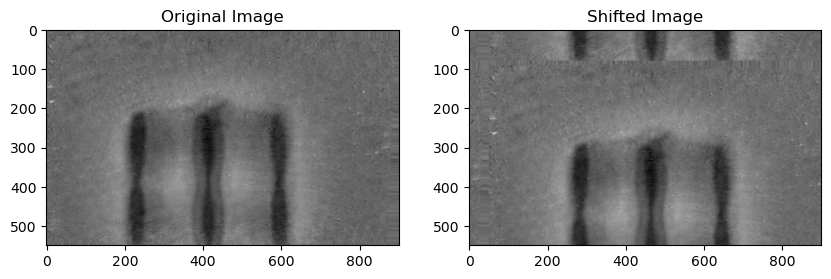

In [28]:
# Plot original and shifted images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(kevinProjOriginal, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Shifted Image")
plt.imshow(newKevinProj, cmap='gray')
plt.show()